In [2]:
import numpy as np

# Transition matrix defines, given the direction we choose to go, what is the probability distribution of the direction we actually go?
T = np.array(
     [
        [
            [0.66667, 0.00000, 0.33333, 0.00000, 0.00000],
            [0.33333, 0.33333, 0.33333, 0.00000, 0.00000],
            [0.33333, 0.33333, 0.33333, 0.00000, 0.00000],
            [0.66667, 0.33333, 0.00000, 0.00000, 0.00000]
        ],
        [
            [0.33333, 0.33333, 0.00000, 0.33333, 0.33333],
            [0.33333, 0.33333, 0.00000, 0.33333, 0.33333],
            [0.00000, 0.66667, 0.00000, 0.33333, 0.33333],
            [0.33333, 0.66667, 0.00000, 0.00000, 0.00000]
        ],
        [
            [0.00000, 0.00000, 1.00000, 0.00000, 0.00000],
            [0.00000, 0.00000, 1.00000, 0.00000, 0.00000],
            [0.00000, 0.00000, 1.00000, 0.00000, 0.00000],
            [0.00000, 0.00000, 1.00000, 0.00000, 0.00000]
        ],
        [
            [0.00000, 0.00000, 1.00000, 1.00000, 0.00000],
            [0.00000, 0.00000, 1.00000, 1.00000, 0.00000],
            [0.00000, 0.00000, 1.00000, 1.00000, 0.00000],
            [0.00000, 0.00000, 1.00000, 1.00000, 0.00000]
        ]
    ] 
)

actions = ["left", "down", "right", "up"]
reward_index = 4

## Recall the Frozen Lake Game...

![image](FrozenLake1.png)

![image](FrozenLake2.png)

In [3]:
def policy_iteration(policy: list[int]):
    Q = np.zeros((4,4))
    Q_copy = np.zeros((4,4))

    # We make our policy and Q table and our Q copy for while we are updating the Q
    # table.
    Q = np.zeros((4, 4))
    Q_copy = np.zeros((4, 4))

    # For 10 iterations we refine our estimate of the Q values for this policy
    for iteration in range(10):
        print(f"Iteration: {iteration}")
        print(Q)
        q = 0

        for state in range(4):
            for action in range(4):
                reward = T[state,action,reward_index]
                for next_state in range(4):
                    # next action DOES follow our policy
                    next_action = policy[next_state]
                    q = q + T[state,action,next_state]*Q[next_state,next_action]
                q=q+reward
                Q_copy[state,action] = q
                q=0

        Q = Q_copy.copy()

### What if we take other actions? We are answering the question: "What is the value of ALL actions according to our policy?"

###  Now let's pick a better policy...

In [4]:
policy = [2, 1, 2, 2]
policy_iteration(policy=policy)

Iteration: 0
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Iteration: 1
[[0.      0.      0.      0.     ]
 [0.33333 0.33333 0.33333 0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]]
Iteration: 2
[[0.         0.11110889 0.11110889 0.11110889]
 [0.44443889 0.44443889 0.55555111 0.22222111]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Iteration: 3
[[0.07407296 0.18518074 0.18518074 0.22221778]
 [0.51851074 0.51851074 0.62962407 0.33333   ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Iteration: 4
[[0.12345444 0.23456148 0.23456148 0.29628963]
 [0.56789148 0.56789148 0.67900556 0.40740185]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Iteration: 5
[[0.1563751  0.26748165 0.26748165 0.34567037]
 [0.60081165 0.60081165 0.71192621 0.45678259]
 [0.         0.         0.         0.        ]
 [0.        

### Now let's try a different policy...

In [5]:
policy = [3,2,2,2]
policy_iteration(policy=policy)

Iteration: 0
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Iteration: 1
[[0.      0.      0.      0.     ]
 [0.33333 0.33333 0.33333 0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]]
Iteration: 2
[[0.         0.11110889 0.11110889 0.11110889]
 [0.44443889 0.44443889 0.55555111 0.22222111]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Iteration: 3
[[0.07407296 0.22221778 0.22221778 0.25925481]
 [0.55554778 0.55554778 0.70369926 0.40740519]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Iteration: 4
[[0.17283741 0.32098148 0.32098148 0.40740148]
 [0.65431148 0.65431148 0.80246519 0.55555259]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Iteration: 5
[[0.27160235 0.40328486 0.40328486 0.53908807]
 [0.73661486 0.73661486 0.86830946 0.6707786 ]
 [0.         0.         0.         0.        ]
 [0.        

### What if we don't know which policy is good?

In [6]:
def greedy_policy(Q, state):
  return np.argmax(Q[state])

def print_policy(Q):
  for state in range(len(Q)):
    act = np.argmax(Q[state])
    print(f"state: {state}, action {act}: {actions[act]}")

Q = np.zeros((4, 4))
Q_copy = np.zeros((4, 4))
actions = ["left", "down", "right", "up"]

# For 10 iterations we refine our estimate of the Q values for this policy
for iteration in range(10):
  if iteration % 1 == 0:
    print(f"Iteration: {iteration}")
    print(Q)
    print_policy(Q)

  for state in range(4):
    for action in range(4):
      q = 0
      reward = T[state,action,reward_index]
      for next_state in range(4):
        next_action = greedy_policy(Q,next_state)
        q = q + T[state,action,next_state]*Q[next_state,next_action]
      q=q+reward
      Q_copy[state,action] = q
      q=0

  Q = Q_copy.copy()

Iteration: 0
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
state: 0, action 0: left
state: 1, action 0: left
state: 2, action 0: left
state: 3, action 0: left
Iteration: 1
[[0.      0.      0.      0.     ]
 [0.33333 0.33333 0.33333 0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]]
state: 0, action 0: left
state: 1, action 0: left
state: 2, action 0: left
state: 3, action 0: left
Iteration: 2
[[0.         0.11110889 0.11110889 0.11110889]
 [0.44443889 0.44443889 0.55555111 0.22222111]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
state: 0, action 1: down
state: 1, action 2: right
state: 2, action 0: left
state: 3, action 0: left
Iteration: 3
[[0.07407296 0.22221778 0.22221778 0.25925481]
 [0.55554778 0.55554778 0.70369926 0.40740519]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
state: 0, action 3: up
state: 1, action 2: right
state: 2, action 0

![image](NoT.png)

In [9]:
import gymnasium as gym

# env = gym.make("FrozenLake-v1", render_mode="human", desc=["SF", "HG"])
env = gym.make("FrozenLake-v1", desc=["SF", "HG"])
gamma = 1.0
learning_rate = 0.1

# q_new = r + sum:p*q_old

# q_new = learning_rate*(r_observed + q(next_state_observed, next_action))
#           + (1 - learning_rate) * q_old
# e.g. "Some weight on what we used to think and some weight on what we see now"
# G=10, q=10 (G is sum of returns)
# G=5, q=9.5 (0.9*10 + 0.1*5)
# G=5, q=.9*p.95 + 0.1*5 (0.9*0.9*10 + 0.1*0.9*5 + 0.1*5)
# We care more about our recent observations than our past observations...
# This is because our policy changes (and also the environment may be changing).

Q = np.zeros((4, 4))

def greedy_policy(Q, state):
  return np.argmax(Q[state])

def e_greedy_policy(Q, state, epsilon):
   # Balance exploration and exploitation
   if np.random.rand() < epsilon:
      return np.random.randint(0, len(Q[state]))
   else:
      return np.argmax(Q[state])

def print_policy(Q):
  for state in range(len(Q)):
    act = np.argmax(Q[state])
    print(f"state: {state}, action {act}: {actions[act]}")

# obs is the starting state we are in (0 - we start in the top left chair)
for i in range(500):
  obs, info = env.reset()
  done = False
  while not done:
      action = e_greedy_policy(Q,obs,epsilon=0.2) # next action according to Q and according to where we are
      #print(f"obs: {obs}, action: {action}")
      
      new_obs, reward, terminated, truncated, info = env.step(action)
      #print(f"new_obs: {new_obs}")

      # Assume we play greedy for the rest of the game
      Q[obs,action] = (1 - learning_rate)*Q[obs,action] + learning_rate*(reward + int(not done)*gamma*Q[new_obs,greedy_policy(Q,new_obs)])

      obs = new_obs
      done = terminated or truncated # reached end of the game, or you've been wandering and nothing happens so early stop
print(Q)

[[0.53604237 0.78738295 0.68238731 0.99999992]
 [0.99999993 0.99773979 0.99513817 0.99686041]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]


### What if the table gets too big?

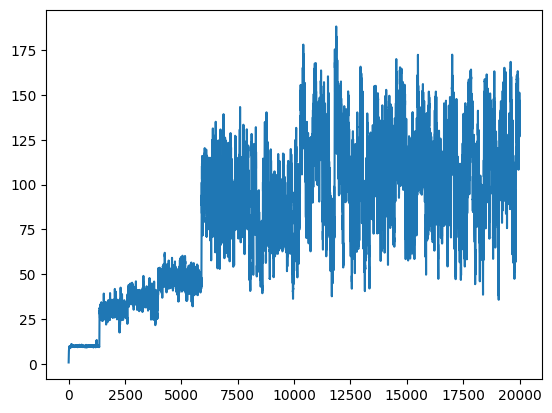

In [14]:
env = gym.make("CartPole-v1")
obs, info = env.reset()
gamma = 0.99
learning_rate = 0.01
Q = np.zeros((2**4, 2))
Q_copy = np.zeros((2**4, 2))

# Discretize our states - 16 buckets (2**4), going left/right, pole left/right, left/right of center, pole moving left/right

def obs_to_discrete(obs):
    disc = 0
    for i in range(len(obs)):
        disc += int(obs[i]>0)*(2**(i)) # creates a bit mask
    return disc


def e_greedy_policy(Q, state, epsilon):
    r = np.random.random()
    if r < epsilon:
        return np.random.randint(0,2)
    else:
        return np.argmax(Q[state])

def print_policy(Q):
    for state in range(len(Q)):
        act = np.argmax(Q[state])
        print(f"state: {state} action {act}{actions[act]}")


reward_hist = []
reward_sum = 0
for n_iter in range(20000):
    obs, info = env.reset()
    done = False
    reward_sum = 0

    while not done:

        state = obs_to_discrete(obs) # discretize function so that we know where we go in our table
        action = e_greedy_policy(Q,state,0.1) # 100/(n_iter+1)
        new_obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        reward_sum += reward

        new_state = obs_to_discrete(new_obs)

        q_new = reward + int(not done)*gamma*np.max(Q[new_state]) # again, in the future we use the greedy policy
        q_old = Q[state,action]
        Q[state,action] = (1-learning_rate)*q_old + learning_rate*(q_new)

        obs = new_obs

    reward_hist.append(reward_sum)

import matplotlib.pyplot as plt

lpsmooth = []
last = 0
for r in reward_hist:
    lpsmooth.append(0.9*last+0.1*r)
    last = lpsmooth[-1]
plt.plot(lpsmooth)
plt.show()
# A perfect agent would be hitting 500 frames each game...